In [1]:
%matplotlib inline
from pprint import pprint

#import plot
import simulate
import harvesting
import market
import withdrawal
import metrics

from decimal import Decimal

import itertools
import math
import pandas
import scipy.stats

In [2]:
YEARS = 21

df = pandas.DataFrame(index=range(1, YEARS+1))

MARKET = market.Returns_US_1871()
for i in range(MARKET.start_year, 2001):
    s = simulate.withdrawals(MARKET.iter_from(i), years=YEARS, harvesting=harvesting.N_60_RebalanceHarvesting, withdraw=withdrawal.ConstantDollar)
    pvs = [int(n.portfolio_post.value_r) for n in s]
    df[i] = pvs

In [3]:
data = df.T[YEARS]
print(data[2000])
print(scipy.stats.percentileofscore(data, data[2000]))

799945
28.46153846153846


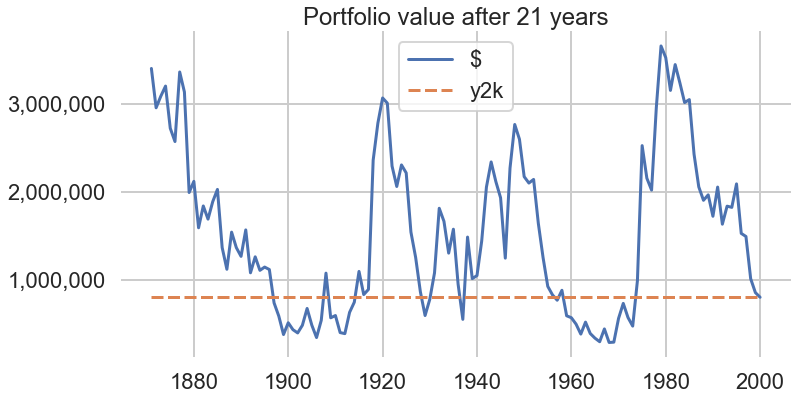

In [4]:
data = df.T[YEARS]
y2k_port = data[2000]

import seaborn
from matplotlib import pyplot as plt
import matplotlib
seaborn.set(style="whitegrid")
seaborn.set_context('poster')
plt.figure(figsize=(12,6))
plt.title(f'Portfolio value after {YEARS} years')
g = seaborn.lineplot(data=pandas.DataFrame({'$': data, 'y2k' : y2k_port}))
seaborn.despine(left=True, bottom=True, offset=20)
g.axes.yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [5]:
s = data.sort_values()
s[0:10]

1968    285406
1969    288991
1966    293913
1965    334605
1906    341511
1899    375775
1962    380666
1912    385959
1964    387763
1902    394028
Name: 21, dtype: int64

In [6]:
data = df.T[YEARS]
print(scipy.stats.percentileofscore(data, data[2000]))

28.46153846153846


In [7]:
YEARS = 3

df = pandas.DataFrame(index=range(1, YEARS+1))

MARKET = market.Returns_US_1871()
for i in range(MARKET.start_year, 2021-YEARS):
    s = simulate.withdrawals(MARKET.iter_from(i), years=YEARS, harvesting=harvesting.N_60_RebalanceHarvesting, withdraw=withdrawal.ConstantDollar)
    pvs = [float(n.withdraw_pct_cur) for n in s]
    df[i] = pvs
n = df.T[YEARS]
n.median()

0.03865077183645124

In [8]:
scipy.stats.percentileofscore(n, .04)

62.585034013605444

In [9]:
n.quantile(.25)

0.03438406012212351

In [33]:
YEARS = 50

df = pandas.DataFrame(index=range(1, YEARS+1))

MARKET = market.Returns_US_1871()
for i in range(MARKET.start_year, 2021-YEARS):
    s = simulate.withdrawals(MARKET.iter_from(i), years=YEARS, harvesting=harvesting.N_60_RebalanceHarvesting, withdraw=lambda p, h: withdrawal.ConstantDollar(p, h, rate=Decimal('.03')))
    pvs = [float(n.portfolio_post.value_r) for n in s]
    df[i] = pvs

In [41]:
df.T[48].min()

998143.3961527428

In [35]:
import scipy.stats
scipy.stats.percentileofscore(df.T[40], 1_000_000)

1.0